# Place field visualization for CRCNS hc-3 data

_Etienne Ackermann, 12/16/2015_

The data can be downloaded from the [CRCNS](http://crcns.org/data-sets/hc/hc-3) (Collaborative Research in Computational Neuroscience) website, and the ```hc-3``` data set in particular.

### Summary

Here I will do a very quick and rough place field visualization to see which cells show place preferences. In particular, we limit the spikes to only those where the animal was running at some minimum velocity (3 cm/s), and then we further restrict place cells to be those with some minimum maximum firing rate (2 Hz) and a maximum mean firing rate (4 Hz).


**WARNING:** We do not know what the sampling frequency is that's associated with the .whl trajectory file. We can assume that the entire experiment was logged in the .whl file, and that a uniform sampling interval was used, so that we can determine the sampling frequency by taking the number of samples in the .whl file, and dividing by the experiment duration. We should check to see that several of the .whl-experiment pairs give us the same sampling frequency...

**CONCLUSION:** It seems like the .whl files were logged at 60 Hz, which is a common sampling rate for video cameras, so at least it seems plausible.

---

## Load trajectory data from .whl file

Cannot load files in C:/...; trying Unix location instead.
Cannot load files in Unix location; trying Mac location instead.
Data loaded successfully.


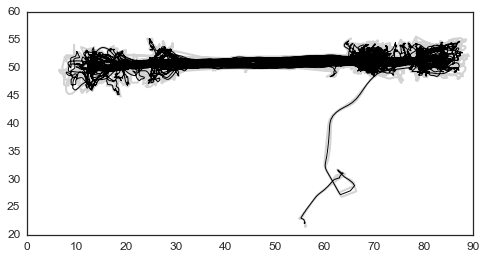

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from pandas import Series, DataFrame

%matplotlib inline

# read trajectory:
try:
    df1whl = pd.read_table( 'C://Etienne//Dropbox//neoReader//Data//gor01-6-7//2006-6-7_11-26-53_lin1//2006-6-7_11-26-53.whl',sep='\t', skiprows=0, names=['x1', 'y1', 'x2', 'y2'] )
    df2whl = pd.read_table( 'C://Etienne//Dropbox//neoReader//Data//gor01-6-7//2006-6-7_16-40-19_lin2//2006-6-7_16-40-19.whl',sep='\t', skiprows=0, names=['x1', 'y1', 'x2', 'y2'] )
except:
    print( "Cannot load files in C:/...; trying Unix location instead.")
    try:
        #df1whl = pd.read_table( '/home/etienne/Dropbox/neoReader/Data/gor01-6-7/2006-6-7_11-26-53_lin1/2006-6-7_11-26-53.whl',sep='\t', skiprows=0, names=['x1', 'y1', 'x2', 'y2'] )
        df2whl = pd.read_table( '/home/etienne/Dropbox/neoReader/Data/gor01-6-7/2006-6-7_16-40-19_lin2/2006-6-7_16-40-19.whl',sep='\t', skiprows=0, names=['x1', 'y1', 'x2', 'y2'] )
        #df1whl = pd.read_table( '/home/etienne/Dropbox/neoReader/Data/gor01-6-12/2006-6-12_15-55-31_lin1/2006-6-12_15-55-31.whl',sep='\t', skiprows=0, names=['x1', 'y1', 'x2', 'y2'] )
        #df2whl = pd.read_table( '/home/etienne/Dropbox/neoReader/Data/gor01-6-12/2006-6-12_16-53-46_lin2/2006-6-12_16-53-46.whl',sep='\t', skiprows=0, names=['x1', 'y1', 'x2', 'y2'] )       
        #df1whl = pd.read_table( '/home/etienne/Dropbox/neoReader/Data/gor01-6-13/2006-6-13_14-42-6_lin1/2006-6-13_14-42-6.whl',sep='\t', skiprows=0, names=['x1', 'y1', 'x2', 'y2'] )
        #df2whl = pd.read_table( '/home/etienne/Dropbox/neoReader/Data/gor01-6-13/2006-6-13_15-22-3_lin2/2006-6-13_15-22-3.whl',sep='\t', skiprows=0, names=['x1', 'y1', 'x2', 'y2'] )
    except:
        print( "Cannot load files in Unix location; trying Mac location instead.")
        try:
            
            #df1whl = pd.read_table( '/Users/etienne/Dropbox/neoReader/Data/gor01-6-7/2006-6-7_11-26-53_lin1/2006-6-7_11-26-53.whl',sep='\t', skiprows=0, names=['x1', 'y1', 'x2', 'y2'] )
            df2whl = pd.read_table( '/Users/etienne/Dropbox/neoReader/Data/gor01-6-7/2006-6-7_16-40-19_lin2/2006-6-7_16-40-19.whl',sep='\t', skiprows=0, names=['x1', 'y1', 'x2', 'y2'] )
        except:
            print( "Unexpected error:", sys.exc_info()[0] )
            raise
        else:
            print( "Data loaded successfully." )
    else:
        print( "Data loaded successfully." )
else:
    print( "Data loaded successfully." )
    
# plot trajectory:
sns.set(rc={'figure.figsize': (8, 4),'lines.linewidth': 1, 'font.size': 16, 'axes.labelsize': 14, 'legend.fontsize': 12, 'ytick.labelsize': 12, 'xtick.labelsize': 12 })
sns.set_style("white")
palette = sns.color_palette()
plt.plot( df2whl['x1'], df2whl['y1'], linewidth=2, color='lightgray');
plt.plot( df2whl['x2'], df2whl['y2'], linewidth=2, color='lightgray');
plt.plot( (df2whl['x1'] + df2whl['x2'])/2, (df2whl['y1'] + df2whl['y2'])/2, linewidth=1, color='k' );

## Visualize position along the x-axis over time, to see how many runs were performed:

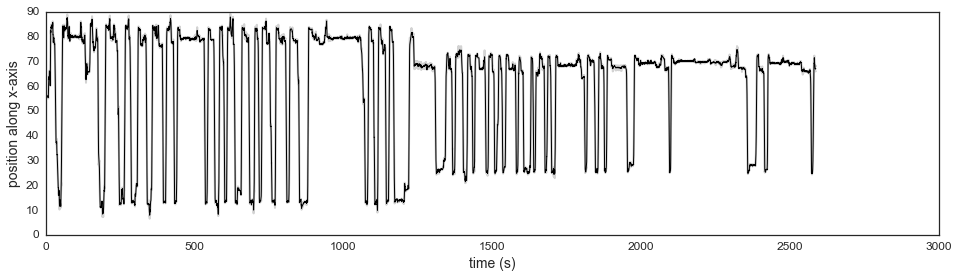

In [2]:
sns.set(rc={'figure.figsize': (16, 4),'lines.linewidth': 1.5, 'font.size': 16, 'axes.labelsize': 14, 'legend.fontsize': 12, 'ytick.labelsize': 12, 'xtick.labelsize': 12 })
sns.set_style("white")
f, ( ax1 ) = plt.subplots(1,1)

ax1.plot(np.linspace(0,len(df2whl.index)/60,len(df2whl.index)),df2whl['x1'], linewidth=2, color='lightgray' )
ax1.plot(np.linspace(0,len(df2whl.index)/60,len(df2whl.index)),df2whl['x2'], linewidth=2, color='lightgray' )
ax1.plot(np.linspace(0,len(df2whl.index)/60,len(df2whl.index)),(df2whl['x1'] + df2whl['x2'])/2, linewidth=1, color='k' )
#ax1.set_xlim([0,2500])
ax1.set_xlabel('time (s)')
ax1.set_ylabel('position along x-axis')

#saveFigure("figures/x-pos vs time.pdf")


## Estimate video sampling rate

In [ ]:
# specify session parameters
# this can either be read from the meta data, or extracted from the file structure, or in this case, hard-coded.
fs = 32552
base_filename1 = '/home/etienne/Dropbox/neoReader/Data/gor01-6-7/2006-6-7_11-26-53_lin1/2006-6-7_11-26-53'
base_filename2 = '/home/etienne/Dropbox/neoReader/Data/gor01-6-7/2006-6-7_16-40-19_lin2/2006-6-7_16-40-19'
num_electrodes = 12

for ele in np.arange(num_electrodes):
    dt1a = pd.read_table( base_filename1 + '.clu.' + str(ele + 1), skiprows=1, names='u' )
    dt1b = pd.read_table( base_filename1 + '.res.' + str(ele + 1), header=None, names='t' )
    dt2a = pd.read_table( base_filename2 + '.clu.' + str(ele + 1), skiprows=1, names='u' )
    dt2b = pd.read_table( base_filename2 + '.res.' + str(ele + 1), header=None, names='t' )
    ls1a = list(dt1a['u'])
    ls1b = list(dt1b['t'])
    ls2a = list(dt2a['u'])
    ls2b = list(dt2b['t'])
    d1 = {'clu' + str( ele + 1 ): Series(ls1a, index=ls1b)}
    d2 = {'clu' + str( ele + 1 ): Series(ls2a, index=ls2b)}
    if ele == 0:
        df1 = DataFrame(d1)
        df2 = DataFrame(d2)
    else:
        df1 = df1.append(DataFrame(d1))
        df2 = df2.append(DataFrame(d2))

        # determine experiment durations:
exp_duration1 = df1.index[-1]/fs # seconds
exp_duration2 = df2.index[-1]/fs # seconds

print("LinearOne lasted {0:2.2f} minutes, sampling at {1} Hz".format(exp_duration1/60, fs))
print("LinearTwo lasted {0:2.2f} minutes, sampling at {1} Hz".format(exp_duration2/60, fs))

print("LinearOne had {0} position estimates, so that the position sampling frequency is approx {1:2.2f} Hz".format(df1whl.index[-1],df1whl.index[-1]/exp_duration1 ))
print("LinearTwo had {0} position estimates, so that the position sampling frequency is approx {1:2.2f} Hz".format(df2whl.index[-1],df2whl.index[-1]/exp_duration2 ))

#### WARNING!! Unfortunately we could **not** get a consistent sampling rate estimate for the two video trajectory (.whl) files... and I could not find any additional information about it online... What to do?

...

I have checked a small random sampling of other experiments, and they seem to agree with the 60 Hz sampling rate, so this is what I will use.

Consequently, I do not know where the missing data are for LinearOne---at the beginning, or the end? Or spread throughout?

In estimating place fields, I will only use LinearTwo for now...

## Load spikes from LinearTwo:

In [4]:
import pickle

#with open('../../Data/st_array1rn.pickle', 'rb') as f:
#    st_array1 = pickle.load(f)
with open('../../Data/st_array2rn.pickle', 'rb') as f:
    st_array2 = pickle.load(f)
    
#st_array2 = cons_st_array

## Load Python modules and helper functions

In [5]:
import sys
sys.path.insert(0, '../')

import numpy as np
import pandas as pd
import pickle 
import seaborn as sns
#import yahmm as ym

from matplotlib import pyplot as plt
from pandas import Series, DataFrame

from efunctions import * # load my helper functions

%matplotlib inline

from scipy.signal import butter, lfilter, filtfilt

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filtfilt(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    #y = lfilter(b, a, data)
    y = filtfilt(b, a, data, padlen=150)
    return y

def rms(x):
    return np.sqrt(np.mean(x**2))

function saveFigure(filename) loaded

Tip: to save a figure, call saveFigure("path/figure.pdf")


## Build place field map for LinearTwo using only x-coords
1. estimate instantaneous running velocity at 60 Hz
2. smooth running velocity with a zero-phase filter
3. consider only spikes corresponding to bins where the instantaneous velocity is above some threshold (3 cm/s?)
4. determine the number of spikes per position bin, and the duration spent in that bin (all on the suprathreshold data)
5. smooth place fields again? using a Gaussian kernel?

In [31]:
# speed as a function of time...

centerx = (np.array(df2whl['x1']) + np.array(df2whl['x2']))/2
centery = (np.array(df2whl['y1']) + np.array(df2whl['y2']))/2

dx = np.ediff1d(centerx,to_begin=0)
dy = np.ediff1d(centery,to_begin=0)
dvdt = np.sqrt(np.square(dx) + np.square(dy))*60 # cm per second
t0 = 0
tend = len(dvdt)/60 # end in seconds

cutoff=0.5
dvdtlowpass = np.fmax(0,butter_lowpass_filtfilt(dvdt, cutoff=cutoff, fs=60, order=6))

print('The animal (gor01) ran an average of {0:2.2f} cm/s'.format(dvdt.mean()))

th = 3 #cm/s
runindex = np.where(dvdtlowpass>=th); runindex = runindex[0]
print("The animal ran faster than th = {0:2.1f} cm/s for a total of {1:2.1f} seconds (out of a total of {2:2.1f} seconds).".format(th,len(runindex)/60,len(centerx)/60))


The animal (gor01) ran an average of 2.89 cm/s
The animal ran faster than th = 3.0 cm/s for a total of 533.6 seconds (out of a total of 2587.8 seconds).


(30, 70)

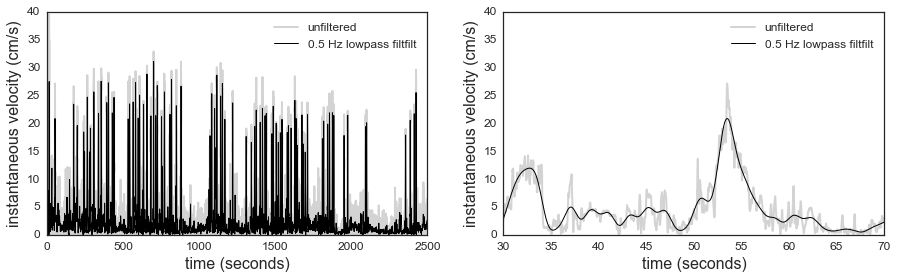

In [38]:
sns.set(rc={'figure.figsize': (15, 4),'lines.linewidth': 3, 'font.size': 18, 'axes.labelsize': 16, 'legend.fontsize': 12, 'ytick.labelsize': 12, 'xtick.labelsize': 12 })
sns.set_style("white")

f, (ax1, ax2) = plt.subplots(1,2)

ax1.plot(np.arange(0,len(dvdt))/60,dvdt,alpha=1,color='lightgray',linewidth=2)
ax1.plot(np.arange(0,len(dvdt))/60,dvdtlowpass, alpha=1,color='k',linewidth=1)
ax1.set_xlabel('time (seconds)')
ax1.set_ylabel('instantaneous velocity (cm/s)')
ax1.legend(['unfiltered', str(cutoff) + ' Hz lowpass filtfilt'])
ax1.set_xlim([0,2500])

ax2.plot(np.arange(0,len(dvdt))/60,dvdt,alpha=1,color='lightgray',linewidth=2)
ax2.plot(np.arange(0,len(dvdt))/60,dvdtlowpass, alpha=1,color='k',linewidth=1)
ax2.set_xlabel('time (seconds)')
ax2.set_ylabel('instantaneous velocity (cm/s)')
ax2.legend(['unfiltered',  str(cutoff) + ' Hz lowpass filtfilt'])
ax2.set_xlim([30,70])


In [ ]:
# extract spikes only corresponding to those time bins where the animal was above threshold:
# idea: bin all spikes in bins corresponding to 60 Hz bins, and then only keep those with indices stored in itemindex

In [39]:
def list_of_spk_time_arrays_to_spk_counts_arrays(st_array_extern, ds=0, fs=0 ):
    """
    st_array: list of ndarrays containing spike times (in sample numbers!)
    ds:       delta sample number; integer value of samples per time bin
    fs:       sampling frequency
    
    argument logic: if only st_array is passed, use default ds; if ds is passed, use as is and ignore fs; if ds and fs are passed, use ds as time in seconds
    
    returns a (numBins x numCell) array with spike counts
    """
    
    st_array = st_array_extern
    
    if fs == 0:
        if ds == 0:
            ds = 1000 # assume default interval size
    else: # sampling frequency was passed, so interpret ds as time-interval, and convert accordingly:
        if ds == 0:
            ds = 1000 # assume default interval size
        else:
            ds = round(ds*fs)
            
    # determine number of units:
    num_units = len(st_array)
    
    #columns = np.arange(0,num_units)
    #df = DataFrame(columns=columns)
    
    maxtime = 0
    for uu in np.arange(num_units):
        try:
            maxtime = max(st_array[uu].max(), maxtime)
        except:
            maxtime = maxtime
    
    # create list of intervals:
    intlist = np.arange(0,maxtime,ds)
    num_bins = len(intlist)
    
    spks_bin = np.zeros((num_bins,num_units))
    
    print("binning data into {0} x {1:2.1f} ms temporal bins...".format(num_bins, ds*1000/fs))
    
    for uu in np.arange(num_units):
        # count number of spikes in an interval:
        spks_bin[:,uu] = np.histogram(st_array[uu], bins=num_bins, density=False, range=(0,maxtime))[0]
        #spk_count_list.append([x&y for (x,y) in zip(st_array[uu]>ii, st_array[uu] < ii+ds)].count(True))
        #st_array[uu] = st_array[uu][st_array[uu]>ii+ds]        
        #if df.empty:
        #    df = DataFrame([spk_count_list], columns=columns)
        #else:
        #    df = df.append(DataFrame([spk_count_list], columns=columns),ignore_index=True)
                    
    return spks_bin

spk_counts2 = list_of_spk_time_arrays_to_spk_counts_arrays(st_array2, ds=0.016666667, fs=32552)
#spk_counts2 = spk_counts2[round(len(spk_counts2)/2):] # form place fields using only 2nd half of data
#spk_counts2 = spk_counts2[:round(len(spk_counts2)/2)] # form place fields using only 1st half of data
runindex = runindex[np.where(runindex<len(spk_counts2))[0]]; # runindexnew = runindexnew[0]


binning data into 155135 x 16.7 ms temporal bins...


### NOTE: at this point, spk_counts2 contains ALL the spikes, binned into 60 Hz time bins to correspond with the velocity estimates. runindex, then, contains the indices of those bins where the animal was running above threshold. These spike counts, are extracted below, and stored in run_spks_bin, which are then used to estimate place fields by binning the spike counts into position bins, noting the time spent in each position bin, and getting an estimated position-dependent firing rate by dividing non-zero spike counts by the time spent in the associated bin.

In [40]:
# get bins of spk counts that correspond to where the animal was running above threshold:
run_spks_bin = spk_counts2[runindex,:]

print('If we use synthetic data, then the total number of spikes in st_array should approx equal total number of spikes in run_spikes_bin:', spk_counts2.sum() - 
run_spks_bin.sum(), 'spikes not accounted for.. Could be due to rounding, etc.')

num_bins = 200 # position bins for place fields
x0 = 0
xl = 100

num_units = len(st_array2)

data = (np.array(df2whl['x1'])[runindex] + np.array(df2whl['x2'])[runindex])/2
#data = np.array(df2whl['x1'][runindex].tolist())
bins = np.linspace(x0,xl,num_bins)
digitized = np.digitize(data, bins) # bin numbers
bin_cnt = [len(data[digitized == i]) for i in range(1, len(bins))]
bin_time = [b/60 for b in bin_cnt] # convert to seconds spent in bin
pfbincenters = bins[:-1] + np.diff(bins)/2

pf2spk_cnt = np.zeros((num_bins,num_units))
closest_bins = np.digitize(data,bins)
for cnt, bb in enumerate(closest_bins):
    pf2spk_cnt[bb,:] += run_spks_bin[cnt,:]
    
pf2 = []
pfsmooth = []
minth = 0.05 # min threshold for backgrnd spking actvy
for uu in np.arange(0,num_units):
    pf2.append([b/max(c,1) for (b,c) in zip(pf2spk_cnt[:,uu],bin_time)])
    pfsmooth.append(butter_lowpass_filtfilt(pf2[uu], cutoff=15, fs=200, order=4))

pfsmooth = np.array(pfsmooth)
pfsmooth[pfsmooth<minth] = minth # enforce a minimum background firing rate.

If we use synthetic data, then the total number of spikes in st_array should approx equal total number of spikes in run_spikes_bin: 584786.0 spikes not accounted for.. Could be due to rounding, etc.


In [41]:
# throw away cells that look like interneurons, or cells that are inactive throughout the entire experiment:
meanfiringrates = pfsmooth.mean(axis=1)
maxfiringrates = pfsmooth.max(axis=1)

max_meanfiringrate = 4 # Hz
min_maxfiringrate = 2 # Hz

pindex = np.where((meanfiringrates<=max_meanfiringrate) & (maxfiringrates>min_maxfiringrate)); pindex = pindex[0]
print("{0} out of {1} cells passed the criteria to be place cells...".format(len(pindex),len(meanfiringrates)))

# order remaining cells by peak hight along the track
peaklocations = pfsmooth.argmax(axis=1)
peakorder = peaklocations[pindex].argsort()

# visualize place fields

22 out of 90 cells passed the criteria to be place cells...


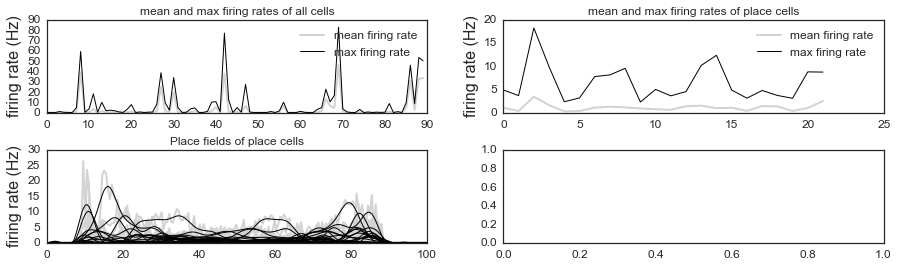

In [42]:
sns.set(rc={'figure.figsize': (15, 4),'lines.linewidth': 3, 'font.size': 18, 'axes.labelsize': 16, 'legend.fontsize': 12, 'ytick.labelsize': 12, 'xtick.labelsize': 12 })
sns.set_style("white")

f, ( (ax1, ax2), (ax3, ax4) ) = plt.subplots(2,2)
ax1.plot(meanfiringrates,linewidth=2,color='lightgray')
ax1.plot(maxfiringrates,linewidth=1,color='k')
ax1.legend(['mean firing rate','max firing rate'])
ax1.set_title('mean and max firing rates of all cells')

ax2.plot(meanfiringrates[pindex],linewidth=2,color='lightgray')
ax2.plot(maxfiringrates[pindex],linewidth=1,color='k')
ax2.legend(['mean firing rate','max firing rate'])
ax2.set_title('mean and max firing rates of place cells')

cell_list = [3,7,11,13,14,27,45]
#cell_list = [3,37,68]
#cell_list = [11]
cell_list = pindex

for uu in cell_list:
    ax3.plot(bins[1:], pf2[uu], linewidth=2, color='lightgray')

for uu in cell_list:
    ax3.plot(bins[1:], pfsmooth[uu], linewidth=1, color='k')

plt.subplots_adjust(hspace=0.40)
#ax3.set_title("place fields in LinearTwo",fontsize=14)
ax1.set_ylabel("firing rate (Hz)")
ax2.set_ylabel("firing rate (Hz)")
ax3.set_ylabel("firing rate (Hz)")
ax3.set_xlim([0,100])
ax3.set_title('Place fields of place cells')

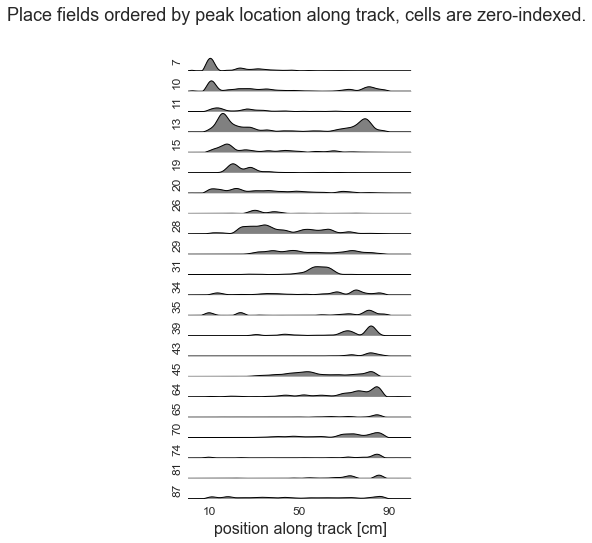

In [52]:
sns.set(rc={'figure.figsize': (4,8),'lines.linewidth': 3, 'font.size': 18, 'axes.labelsize': 16, 'legend.fontsize': 12, 'ytick.labelsize': 12, 'xtick.labelsize': 12 })
sns.set_style("white")

f, axes = plt.subplots(len(pindex), sharex=True, sharey=True)
plt.subplots_adjust(hspace=0.100)

for ii,pp in enumerate(pindex[peakorder]):
    axes[ii].plot(bins[1:], pfsmooth[pp],linewidth=1,color='k')
    axes[ii].fill_between(bins[1:], 0, pfsmooth[pp], color='gray')
    axes[ii].set_xticks([])
    axes[ii].set_yticks([])
    axes[ii].spines['top'].set_visible(False)
    axes[ii].spines['right'].set_visible(False)
    axes[ii].spines['bottom'].set_visible(False)
    axes[ii].spines['left'].set_visible(False)
    axes[ii].set_ylabel(pindex[ii], fontsize=12)
    
axes[-1].set_xticks([10,50,90])
axes[-1].set_xlabel('position along track [cm]')
f.suptitle('Place fields ordered by peak location along track, cells are zero-indexed.')

## Now decode position to see how well we can do
1. using BVR sequences, which is 'cheating', because we used those sequences to learn the place fields
2. using SWR sequences, which is cool, but for which we don't know the ground truth...

### NOTE: we will re-bin observations in 5 ms bins, so that we can do the 20 ms decoding in 5 ms increments
### NOTE: "[SfN] 4 - Place cell overlap" is kind of messy, but finally included the rest-removed BVR creation. I might do a complete overhaul of that though...

"Place fields. Position was linearized and binned into 2.5 cm bins. Directional
place fields were calculated as the number of spikes fired in a particular position
bin and running direction divided by the time spent in that bin, smoothed with a
Gaussian kernel with a s.d. of 5 cm, and identified when the peak firing rate of the
pyramidal cell along the position bins was no less than 1 Hz. The place field size
was defined as the total area of position bins where the firing rates were no less
than 1 Hz." -- Silva, D., Feng, T., & Foster, D. J. (2015). Trajectory events across hippocampal place cells require previous experience. Nature neuroscience, 18(12), 1772-1779.

In [53]:
tau = 0.25   # sec (decoding time window)
tbin = 0.25 # sec (decoding time step/resolution)
bins_per_window = round(tau/tbin)

spk_counts2_supersampled = list_of_spk_time_arrays_to_spk_counts_arrays(st_array2, ds=tbin, fs=32552)


binning data into 10352 x 250.0 ms temporal bins...


In [54]:
# need to resample running velocity, or come up with a better alternative?
time_axis = np.arange(0,len(dvdt))/60 # in  seconds
running_vel_supersampled = np.interp(np.arange(0,len(spk_counts2_supersampled))*tbin,time_axis,dvdtlowpass)
truepos_supersampled = np.interp(np.arange(0,len(spk_counts2_supersampled))*tbin,time_axis,centerx)

print('The animal (gor01) ran an average of {0:2.2f} cm/s'.format(running_vel_supersampled.mean()))

th = 3 #cm/s
runindex_supersampled = np.where(running_vel_supersampled>=th); runindex_supersampled = runindex_supersampled[0]
print("The animal ran faster than th = {0:2.1f} cm/s for a total of {1:2.1f} seconds (out of a total of {2:2.1f} seconds).".format(th,len(runindex_supersampled)*tbin,len(centerx)/60))


The animal (gor01) ran an average of 2.90 cm/s
The animal ran faster than th = 3.0 cm/s for a total of 534.2 seconds (out of a total of 2587.8 seconds).


In [55]:
spk_counts2_supersampled_run = spk_counts2_supersampled[runindex_supersampled]
truepos_supersampled_run = truepos_supersampled[runindex_supersampled]

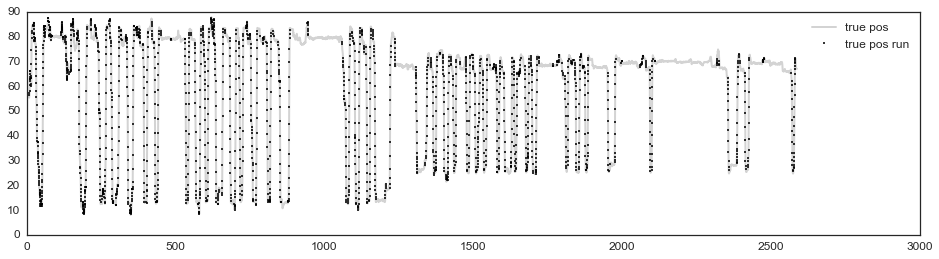

In [56]:
sns.set(rc={'figure.figsize': (16,4),'lines.linewidth': 3, 'font.size': 18, 'axes.labelsize': 16, 'legend.fontsize': 12, 'ytick.labelsize': 12, 'xtick.labelsize': 12 })
sns.set_style("white")
plt.plot(np.arange(0,len(spk_counts2_supersampled))*tbin,truepos_supersampled, linewidth=2, color='lightgray' )
plt.plot(runindex_supersampled*tbin,truepos_supersampled_run,marker='o', linestyle='None', markersize=2, color='k')
plt.legend(['true pos', 'true pos run'])

Here we assume all positions are equally likely, and we use

$$P(\mathbf{x}|\mathbf{n}) = c(\tau,\mathbf{n}) P(\mathbf{x}) \left( \prod_{i=1}^C f_i(\mathbf{x})^{n_i} \right) \exp \left(-\tau \sum_{i=1}^C f_i(\mathbf{x}) \right) $$

to find the distribution at each time point. In particular, we take $\tau=20$ ms, and we advance our decoding window in 5 ms steps.

In [57]:
# problem with approach!!! Discontinuities exist in run segments, so that smoothing can average temporally discontinuous segments!

# solution: first get code working on ALL data (not just run data). However, SWR events can still throw off estimates...

x = bins # spatial bins **could resample smoothed place fields onto new spatial grid as well, if we want to make it more flexible

#n  C x 1        changes every time step
#fi C x 1        never changes
#f  C x nbins    never changes

trange=1
P = np.zeros((num_bins-1,trange))
dec_errors = []
f = pfsmooth[pindex,:]
dec_pos = np.zeros((len(runindex_supersampled),1))
for tt in np.arange(0,len(runindex_supersampled)-bins_per_window): #len(spk_counts2_5ms_run)-4):
    #tt+=1 # time index
    n = spk_counts2_supersampled_run[tt:tt+bins_per_window,pindex].sum(axis=0)

    nn = np.tile(n,(num_bins-1,1)).T
    if nn.max() == 0:
#        print('No spikes in window, so cannot decode position!')
        P = P
    else:
        P = np.exp((np.log((f)**(nn))).sum(axis=0) - tau*f.sum(axis=0))
        P = P/P.sum() # normaization not strictly necessary
        est_pos = P.argmax()

        #print("estimated position: {0:2.1f} cm; actual position: {1:2.1f} cm".format(bins[est_pos],truepos_5ms_run[tt]))
        #print("decoding error: {0:2.1f} cm". format(np.abs(bins[est_pos] -truepos_5ms_run[tt])))
        dec_errors.append(np.abs(bins[est_pos] -truepos_supersampled_run[tt+round(bins_per_window/2)]))
        
    dec_pos[tt] = bins[P.argmax()]
    
print("average decoding error: {0:2.1f} cm".format(np.array(dec_errors).mean()))

average decoding error: 16.7 cm


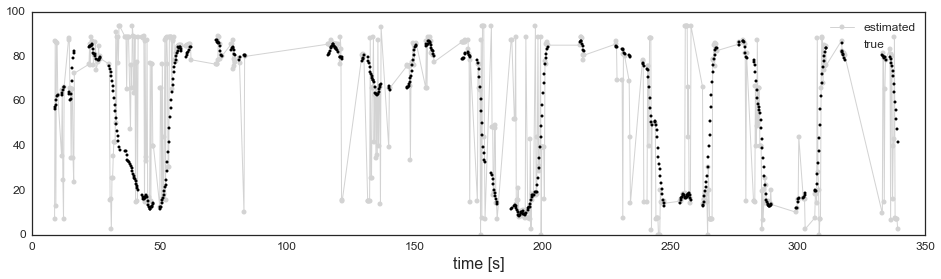

In [58]:
sns.set(rc={'figure.figsize': (16,4),'lines.linewidth': 3, 'font.size': 18, 'axes.labelsize': 16, 'legend.fontsize': 12, 'ytick.labelsize': 12, 'xtick.labelsize': 12 })
sns.set_style("white")
plt.plot(runindex_supersampled[0:500]*tbin,dec_pos[0:500],color='lightgray', marker='o', markersize=5,linewidth=1)
plt.plot(runindex_supersampled[0:500]*tbin,truepos_supersampled_run[0:500],linewidth=1,color='k', marker='o', markersize=3,linestyle='None')
plt.legend(['estimated','true'])
plt.xlabel('time [s]')

In [59]:
dec_pos[5:6]

array([[ 62.81407035]])

In [60]:
#tt=4000
tt=220
tt+=1
n = spk_counts2_5ms_run[tt:tt+4,pindex].sum(axis=0)

nn = np.tile(n,(num_bins-1,1)).T
if nn.max() == 0:
    print('No spikes in window, so cannot decode position!')
    P = P
else:
    P = np.exp((np.log((f)**nn)).sum(axis=0) - tau*f.sum(axis=0))
    P = P/P.sum() # normaization not strictly necessary
    est_pos = P.argmax()

    print("estimated position: {0:2.1f} cm; actual position: {1:2.1f} cm".format(bins[est_pos],truepos_5ms_run[tt]))
    print("decoding error: {0:2.1f} cm". format(np.abs(bins[est_pos] -truepos_5ms_run[tt])))
    dec_errors.append(np.abs(bins[est_pos] -truepos_5ms_run[tt]))

dec_pos[tt] = bins[P.argmax()]

plt.plot(bins[0:-1],P)

NameError: name 'spk_counts2_5ms_run' is not defined

In [ ]:
n[peakorder]

In [ ]:
sns.set(rc={'figure.figsize': (16,4),'lines.linewidth': 3, 'font.size': 18, 'axes.labelsize': 16, 'legend.fontsize': 12, 'ytick.labelsize': 12, 'xtick.labelsize': 12 })
sns.set_style("white")
plt.plot(np.diff(runindex_supersampled))

In [ ]:
nums = runindex_supersampled
run_ends = np.where(np.diff(nums)-1)[0] + 1
sseq_lengths = np.diff(np.hstack((0, run_ends, nums.size)))
np.diff(np.hstack((0, run_ends, nums.size))).max()

In [ ]:
run_ends

In [ ]:
sseq_lengths[sseq_lengths<bins_per_window]

In [ ]:
len(runindex_supersampled)

## Correlation analysis (assumes good decoding accuracy)
My current understanding of this correlation analysis is that it is only appropriate for constant velocity linear sequences. Is this intuition correct?

In [ ]:
T = np.array([3,4,5,6,7,8]) # temporal indices for a particular candidate sequence
P = np.array([0.3,0.8,0.5,0.6,0.7,0.5]) # positions or position indices for a particular sequence
prob = np.array([0.3,0.04,0.1,0.1,0.7,0.2]) # probabilities of [peak] decoded positions for seq

In [ ]:
def mXprob(X,prob):
    den = prob.sum()
    num = (prob*X).sum()
    return num/den

def covXYprob(X,Y,prob):
    den = prob.sum()
    num = (prob*(X - mXprob(X,prob))*(Y - mXprob(Y,prob))).sum()
    return num/den

def corrXYprob(X,Y,prob):
    den = np.sqrt(covXYprob(X,X,prob)*covXYprob(Y,Y,prob))
    num = covXYprob(X,Y,prob)
    return num/den

In [ ]:
corrXYprob(T,P,prob)

## Re-decode; 

In [61]:
# note that here we re-sample placefields simply with linear interpolation. A more 'accurate' approach might be to compute the mean firing rate within each new bin...
def resample_placefields(pfsmooth, s_bin, pfbincenters, x0,xl):
    newx = np.arange(x0,xl,s_bin) + s_bin/2
    ss_pfsmooth = np.zeros((pfsmooth.shape[0],len(newx)))
    for cc in np.arange(0,pfsmooth.shape[0]):
        ss_pfsmooth[cc,:] = np.interp(newx,pfbincenters,pfsmooth[cc,:])
    return ss_pfsmooth, newx

def resample_velocity(velocity, t_bin, tvel, t0,tend):
    newt = np.arange(t0,tend,t_bin) + t_bin/2
    newvel = np.zeros((1,len(newt)))
    newvel = np.interp(newt,tvel,velocity)
    return newvel, newt

In [62]:
# need to be able to get place fielda in arbitrary [spatial] resolution
# need to be able to get spikes in arbitrary [temporal] resolution
# need to be able to get running velocity in arbitrary [temporal] resolution

s_bin = 0.5 # cm of spatial bins
ss_pfsmooth, ss_pfbincenters = resample_placefields(pfsmooth, s_bin, pfbincenters, x0, xl)#super-sampled or sub-sampled smoothed place fields

t_bin = 0.25 # sec; temporal resolution for binning spikes
ss_spk_counts2 = list_of_spk_time_arrays_to_spk_counts_arrays(st_array2, ds=t_bin, fs=32552)

# WARNING!! This hack only works for evaluating first half/portion of the data, because the position, velocity, etc. are not automatically changed...
#ss_spk_counts2 = ss_spk_counts2[:round(len(ss_spk_counts2)/2)] # 1st half of data
#ss_spk_counts2 = ss_spk_counts2[round(len(ss_spk_counts2)/2):] # 2nd half of data


time_axis = np.arange(0,len(dvdt))/60
ss_velocity, ss_tvel = resample_velocity(velocity=dvdtlowpass,t_bin=t_bin,tvel=time_axis,t0=0,tend=tend)
ss_truepos = np.interp(np.arange(0,len(ss_spk_counts2))*t_bin,time_axis,centerx)

print('The animal (gor01) ran an average of {0:2.2f} cm/s'.format(ss_velocity.mean()))

th = 3 #cm/s
ss_runindex = np.where(ss_velocity>=th); ss_runindex = ss_runindex[0]
ss_runindex = ss_runindex[np.where(ss_runindex<len(ss_spk_counts2))[0]]; # runindexnew = runindexnew[0]
print("The animal ran faster than th = {0:2.1f} cm/s for a total of {1:2.1f} seconds (out of a total of {2:2.1f} seconds).".format(th,len(ss_runindex)*t_bin,len(centerx)/60))

tau = 0.25   # sec (decoding time window)
bins_per_window = round(tau/t_bin)

print("Decoding with {0} x {1} ms bins per window, into one of {2} spatial bins with size {3} cm each...".format(bins_per_window,t_bin*1000,len(ss_pfbincenters),s_bin))

binning data into 10352 x 250.0 ms temporal bins...
The animal (gor01) ran an average of 2.90 cm/s
The animal ran faster than th = 3.0 cm/s for a total of 532.8 seconds (out of a total of 2587.8 seconds).
Decoding with 1 x 250.0 ms bins per window, into one of 200 spatial bins with size 0.5 cm each...


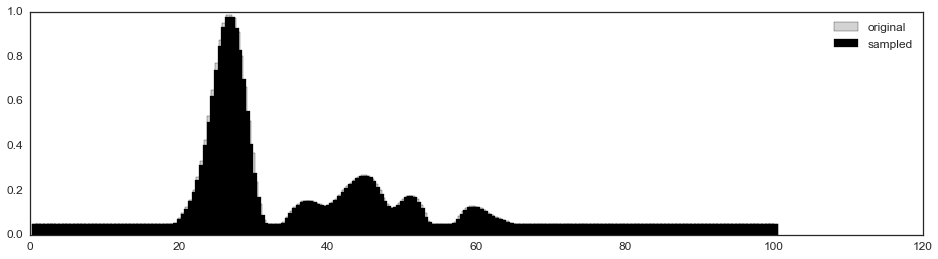

In [63]:
cc=3
sns.set(rc={'figure.figsize': (16,4),'lines.linewidth': 3, 'font.size': 18, 'axes.labelsize': 16, 'legend.fontsize': 12, 'ytick.labelsize': 12, 'xtick.labelsize': 12 })
sns.set_style("white")
plt.bar(pfbincenters,pfsmooth[cc,:],color='lightgray')
plt.bar(ss_pfbincenters,ss_pfsmooth[cc,:],color='k')
plt.legend(['original','sampled'])

In [64]:
# problem with approach!!! Discontinuities exist in run segments, so that smoothing can average temporally discontinuous segments!

# solution: first get code working on ALL data (not just run data). However, SWR events can still throw off estimates...

ss_spk_counts2_run = ss_spk_counts2[ss_runindex]
ss_truepos_run = ss_truepos[ss_runindex]

x = ss_pfbincenters # spatial bins **could resample smoothed place fields onto new spatial grid as well, if we want to make it more flexible

#n  C x 1        changes every time step
#fi C x 1        never changes
#f  C x nbins    never changes

trange=1
P = np.zeros((len(ss_pfbincenters),trange))
dec_errors = []
f = ss_pfsmooth[pindex,:]
dec_pos = np.zeros((len(ss_runindex),1))
for tt in np.arange(0,len(ss_runindex)-bins_per_window): #len(spk_counts2_5ms_run)-4):
    #tt+=1 # time index
    n = ss_spk_counts2_run[tt:tt+bins_per_window,pindex].sum(axis=0)

    nn = np.tile(n,(len(ss_pfbincenters),1)).T
    if nn.max() == 0:
        #print('No spikes in window, so cannot decode position!')
        P = P
    else:
        P = np.exp((np.log((f)**(nn))).sum(axis=0) - tau*f.sum(axis=0))
        P = P/P.sum() # normalization not strictly necessary
        est_pos = P.argmax()

        #print("estimated position: {0:2.1f} cm; actual position: {1:2.1f} cm".format(bins[est_pos],truepos_5ms_run[tt]))
        #print("decoding error: {0:2.1f} cm". format(np.abs(bins[est_pos] -truepos_5ms_run[tt])))
        dec_errors.append(np.abs(x[est_pos] -ss_truepos_run[tt+round(bins_per_window/2)]))
        dec_errors.append(np.abs(x[est_pos] -ss_truepos_run[tt+0]))
        
    dec_pos[tt] = x[P.argmax()]
    
print("average decoding error: {0:2.1f} cm".format(np.array(dec_errors).mean()))

average decoding error: 16.9 cm


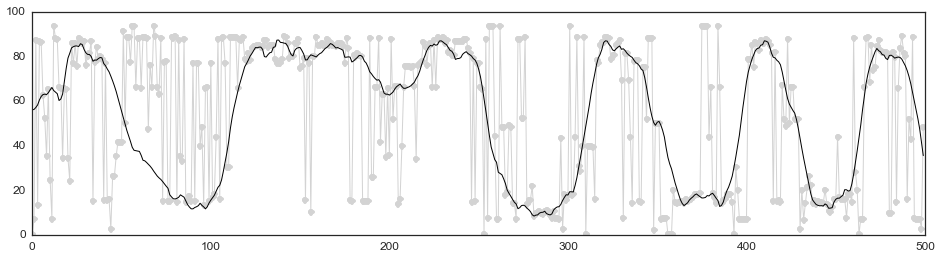

In [65]:
plt.plot(dec_pos[0:500],linewidth=1,color='lightgray',marker='o')
plt.plot(ss_truepos_run[round(bins_per_window/2):500+round(bins_per_window/2)],linewidth=1,color='k')

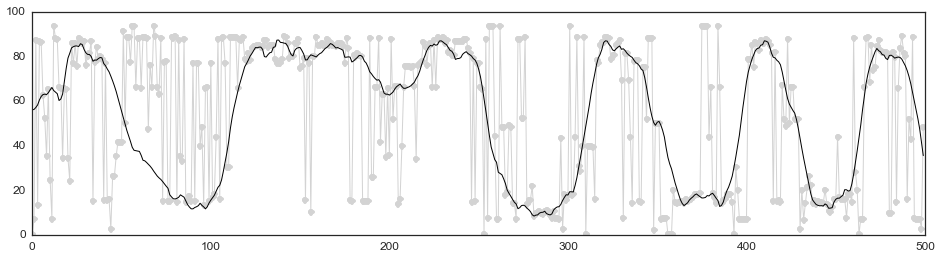

In [66]:
plt.plot(dec_pos[0:500],linewidth=1,color='lightgray',marker='o')
plt.plot(ss_truepos_run[round(bins_per_window/2):500+round(bins_per_window/2)],linewidth=1,color='k')

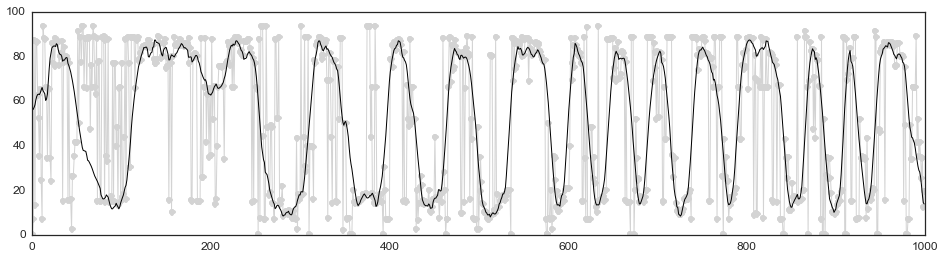

In [67]:
plt.plot(dec_pos[:1000],linewidth=1,color='lightgray',marker='o')
plt.plot(ss_truepos_run[round(bins_per_window/2):1000-round(bins_per_window/2)],linewidth=1,color='k')

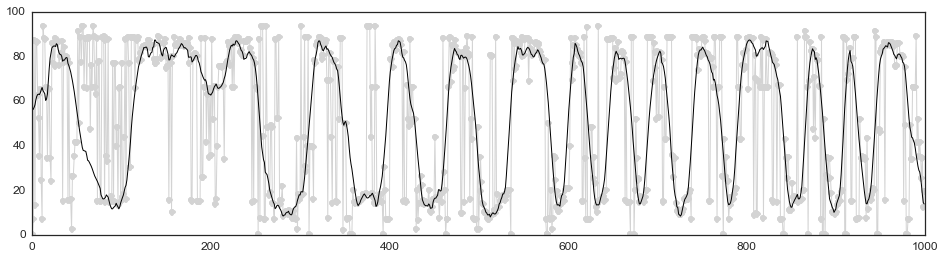

In [68]:
plt.plot(dec_pos[:1000],linewidth=1,color='lightgray',marker='o')
plt.plot(ss_truepos_run[round(bins_per_window/2):1000-round(bins_per_window/2)],linewidth=1,color='k')

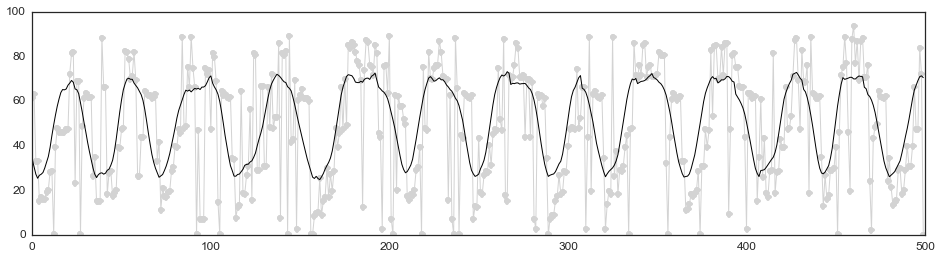

In [69]:
plt.plot(dec_pos[-500:],linewidth=1,color='lightgray',marker='o')
plt.plot(ss_truepos_run[-500-round(bins_per_window/2):],linewidth=1,color='k')

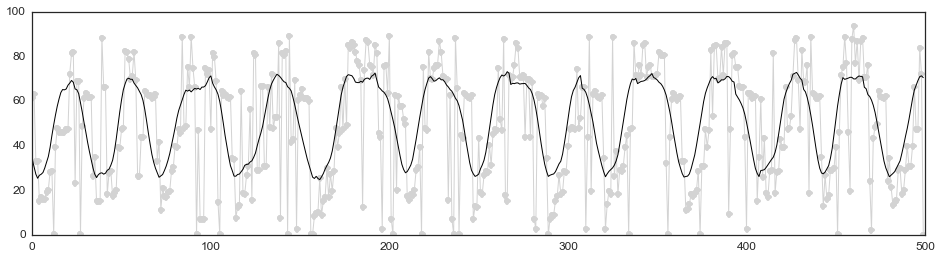

In [70]:
plt.plot(dec_pos[-500:],linewidth=1,color='lightgray',marker='o')
plt.plot(ss_truepos_run[-500-0*round(bins_per_window/2):],linewidth=1,color='k')

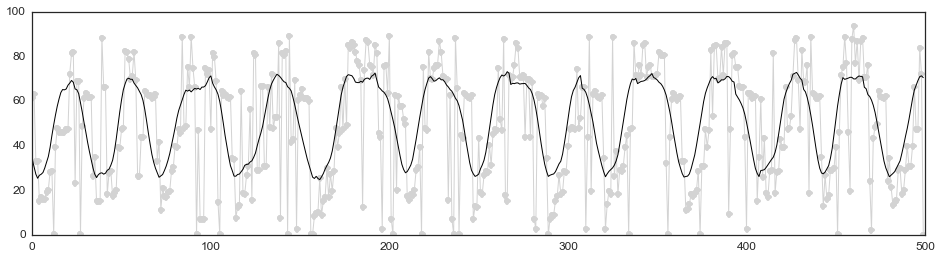

In [71]:
plt.plot(dec_pos[-500:],linewidth=1,color='lightgray',marker='o')
plt.plot(ss_truepos_run[-500-0*round(bins_per_window/2):],linewidth=1,color='k')

## Conclusion: second half of [position] data seems messed up... For all the days!

Nevertheless, I will now try to run the correlation analysis on SWR sequences to compare with our replay score

In [ ]:
# step 1. identify SWR sequences: in time bins, or in sampling time? Probably sampling time, followed by binning...
# only keep sequences that meet criteria, namely length 100--500 ms
# step 2. decode w normalized rate tuning curves using the 5-20 ms sliding window approach... 
# Q. What to do about detection on the edges? I can decode T/5-3 positions in a sequence of length T ms
# this is equivalent to 17--97 position estimates for 100--500 ms sequences

## Generate synthetic spikes from learned place fields and actual position data

In [35]:
from GenerateInhomogeneousPlaceCellSpikes import GenerateSpikes

# extract running trajectories from real data:
nums = runindex
run_ends = np.where(np.diff(nums)-1)[0] + 1
seq_lengths = np.diff(np.hstack((0, run_ends, nums.size)))
runbdries = np.hstack((0,run_ends))

# each spike train corresponding to a trajectory is generated between [0,tend)
# and then a time offset is added, so that the overall spike times are consistent
# with that of the original experiment. In that way, when we re-bin and
# select those bins with run_vel > th, we will get the correct spikes.

#seq_lengths[sseq_lengths<bins_per_window]

fs=32552
truepos60Hz = (np.array(df2whl['x1'])[runindex] + np.array(df2whl['x2'])[runindex])/2
numCells = pfsmooth.shape[0]
NumTrajectories = len(runbdries)
SpikeRasters = [[[] for _ in range(numCells)] for _ in range(NumTrajectories)] 

for ii in np.arange(len(runbdries)-1):
    for nn in np.arange(numCells):
        traj_start_bin = runindex[runbdries[ii]]
        traj_end_bin = runindex[runbdries[ii+1]-1] # inclusive
        #print("Trajectory {0} length is {1} bins, or {2:2.2f} seconds.".format(ii,traj_end_bin-traj_start_bin + 1, (traj_end_bin-traj_start_bin + 1)/60))
        t_offset = traj_start_bin/60
        posvect = truepos60Hz[traj_start_bin:traj_end_bin+1]
        TrajDuration = len(posvect)/60
        #print("Traj duration {0:2.2f}".format(TrajDuration))
        tvect = np.linspace(0,TrajDuration, len(posvect)) # WARNING! This does not work when traj_len == 1, but this should never happen anyway

        posFun = lambda t: np.interp(t,tvect,posvect)
        PlaceFieldRate = lambda x: np.interp(x,pfbincenters,pfsmooth[nn,:])
        maxrate = pfsmooth[nn,:].max()

        SpikeRasters[ii][nn] = np.round((t_offset + GenerateSpikes(lambda x,t : PlaceFieldRate(x), maxrate, posFun, TrajDuration))*fs);
        
# consolidate spike rasters (not stratified by trajectory)
cons_st_array = []
for nn in np.arange(numCells):
    st = np.zeros(0)
    for ii in np.arange(NumTrajectories):
        st = np.hstack((st,SpikeRasters[ii][nn]))
    st = np.sort(st)
    cons_st_array.append(st)
    

In [36]:
cons_st_array

[array([  1078454.,   1697762.,   1974559.,   2024258.,   3790539.,
          5918011.,   6362255.,   7981002.,   8370351.,   8386560.,
         10000817.,  12108513.,  12770081.,  17402094.]),
 array([  1764495.,   3944050.,   8019282.,   9085138.,  11628141.,
         12062930.,  13601577.]),
 array([  1085676.,   1114259.,   4549766.,   5698219.,   7980803.,
          8385686.,  10978218.,  11069210.,  13146975.,  13600789.,
         13711723.]),
 array([   502122.,   1307796.,   1345854.,   4239797.,   7982921.,
          8714698.,   9016100.,   9312668.,  10880940.,  12073823.,
         13154556.,  14023968.,  14375250.,  17414269.]),
 array([   921695.,   1015633.,   1029920.,   1474767.,   1710444.,
          1780040.,   4841343.,   4857204.,   5894467.,   6357310.,
          7901457.,   8061259.,   9279288.,  10352115.,  10699083.,
         12337431.,  12774835.,  12832471.]),
 array([  1651287.,   4769736.,   5082590.,   7597250.,   8603855.,
          9020030.,   9112305.,  1